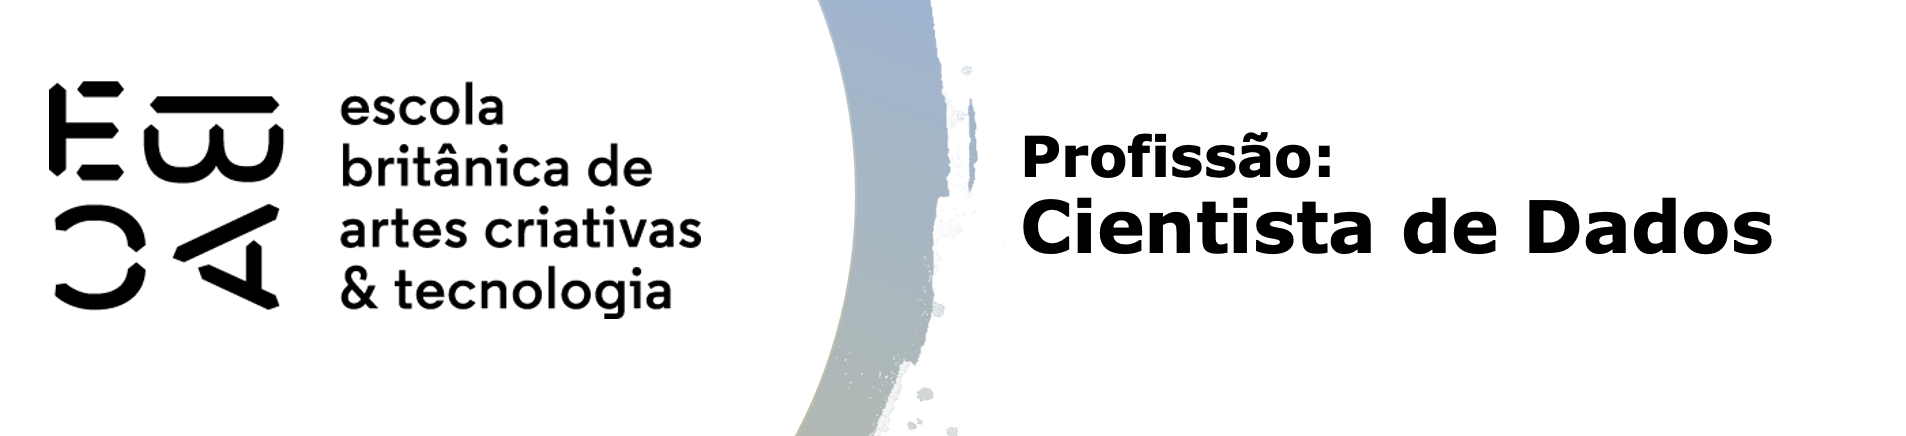

Módulo 21 <br> Professor: Lucas Serra 

# Módulo 21 - Atividade 3

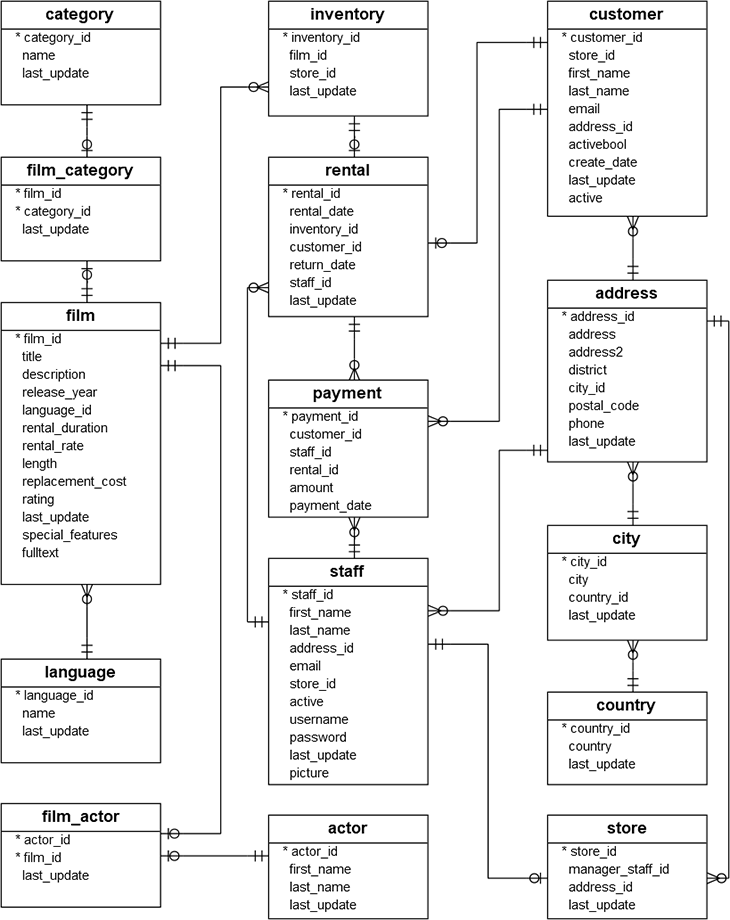

### Calcule a média por nome e sobrenome do ator da seguintes variáveis:
- rental_duration
- rental_rate
- length
- replacement_cost

### Calcule a soma de amount (preço total do aluguel) por nome, sobrenome e email do cliente (customer) e indique os 10 clientes que mais gastaram e os 10 que menos gastaram.


In [1]:
import psycopg2 as pg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Conexão com o banco de dados + estilo dos gráficos
conn = pg2.connect(
    host='localhost', 
    port=5432, 
    dbname='Dvd-rental', 
    user='postgres', 
    password='', #Exclui só pra pegar o hábito de segurança, eu acho 
    options='-c client_encoding=UTF8'
)

sns.set(style="whitegrid")

In [3]:
  # Criando as consultas que serão utilizadas


# Consulta para média das variáveis do filme por nome e sobrenome do ator
query_actor_stats = """
SELECT
    a.first_name AS actor_first_name,
    a.last_name AS actor_last_name,
    AVG(f.rental_duration) AS avg_rental_duration,
    AVG(f.rental_rate) AS avg_rental_rate,
    AVG(f.length) AS avg_length,
    AVG(f.replacement_cost) AS avg_replacement_cost
FROM
    actor a
JOIN
    film_actor fa ON a.actor_id = fa.actor_id
JOIN
    film f ON fa.film_id = f.film_id
GROUP BY
    a.first_name, a.last_name
ORDER BY
    a.last_name, a.first_name;
"""


# Consulta para soma do preço total do aluguel (amount) por cliente
query_customer_spending = """
SELECT
    c.first_name AS customer_first_name,
    c.last_name AS customer_last_name,
    c.email,
    SUM(p.amount) AS total_spent
FROM
    customer c
JOIN
    payment p ON c.customer_id = p.customer_id
GROUP BY
    c.first_name, c.last_name, c.email
ORDER BY
    total_spent DESC
LIMIT 10;
"""


# Consulta para os 10 que menos gastaram
query_customer_spending_least = """
SELECT
    c.first_name AS customer_first_name,
    c.last_name AS customer_last_name,
    c.email,
    SUM(p.amount) AS total_spent
FROM
    customer c
JOIN
    payment p ON c.customer_id = p.customer_id
GROUP BY
    c.first_name, c.last_name, c.email
ORDER BY
    total_spent ASC
LIMIT 10;
"""

In [4]:
# Criando o cursor
cur = conn.cursor()


    # Executando as consultas


#-----------------------------------


# Executando a consulta para as médias
cur.execute(query_actor_stats)
actor_data = cur.fetchall()

# Convertendo a consulta para o dataframe "df_actor_stats"
actor_colnames = [desc[0] for desc in cur.description]
df_actor_stats = pd.DataFrame(actor_data, columns=actor_colnames)


#-----------------------------------


# Executando a consulta para os 10 que mais gastaram
cur.execute(query_customer_spending)
top_customers_data = cur.fetchall()

# Convertendo para DataFrame
customer_colnames = [desc[0] for desc in cur.description]
df_top_customers = pd.DataFrame(top_customers_data, columns=customer_colnames)


#-----------------------------------


# Executando a consulta para os 10 que menos gastaram
cur.execute(query_customer_spending_least)
least_customers_data = cur.fetchall()

# Convertendo para DataFrame
df_least_customers = pd.DataFrame(least_customers_data, columns=customer_colnames)


#-----------------------------------


# Fechando o cursor e a conexão
cur.close()
conn.close()

In [5]:
#Plotando a média das variaveis dos filmes por ATOR

print("Média das variáveis do filme por ator:\n")
print(df_actor_stats,'\n\n')

Média das variáveis do filme por ator:

    actor_first_name actor_last_name avg_rental_duration     avg_rental_rate  \
0          Christian          Akroyd  4.7500000000000000  3.1150000000000000   
1             Debbie          Akroyd  5.3750000000000000  2.9900000000000000   
2            Kirsten          Akroyd  4.7941176470588235  3.4605882352941176   
3               Cuba           Allen  4.7200000000000000  2.9900000000000000   
4                Kim           Allen  4.6785714285714286  2.6328571428571429   
..               ...             ...                 ...                 ...   
194              Uma            Wood  5.1142857142857143  3.0471428571428571   
195          Cameron            Wray  4.8947368421052632  3.3057894736842105   
196          Cameron       Zellweger  4.9696969696969697  3.2324242424242424   
197            Julia       Zellweger  5.2500000000000000  3.6150000000000000   
198           Minnie       Zellweger  5.0000000000000000  2.9900000000000000   



Top 10 clientes que mais gastaram:

  customer_first_name customer_last_name                              email  \
0             Eleanor               Hunt    eleanor.hunt@sakilacustomer.org   
1                Karl               Seal       karl.seal@sakilacustomer.org   
2              Marion             Snyder   marion.snyder@sakilacustomer.org   
3              Rhonda            Kennedy  rhonda.kennedy@sakilacustomer.org   
4               Clara               Shaw      clara.shaw@sakilacustomer.org   
5               Tommy            Collazo   tommy.collazo@sakilacustomer.org   
6                 Ana            Bradley     ana.bradley@sakilacustomer.org   
7              Curtis               Irby     curtis.irby@sakilacustomer.org   
8              Marcia               Dean     marcia.dean@sakilacustomer.org   
9                Mike                Way        mike.way@sakilacustomer.org   

  total_spent  
0      211.55  
1      208.58  
2      194.61  
3      191.62  
4      189.60

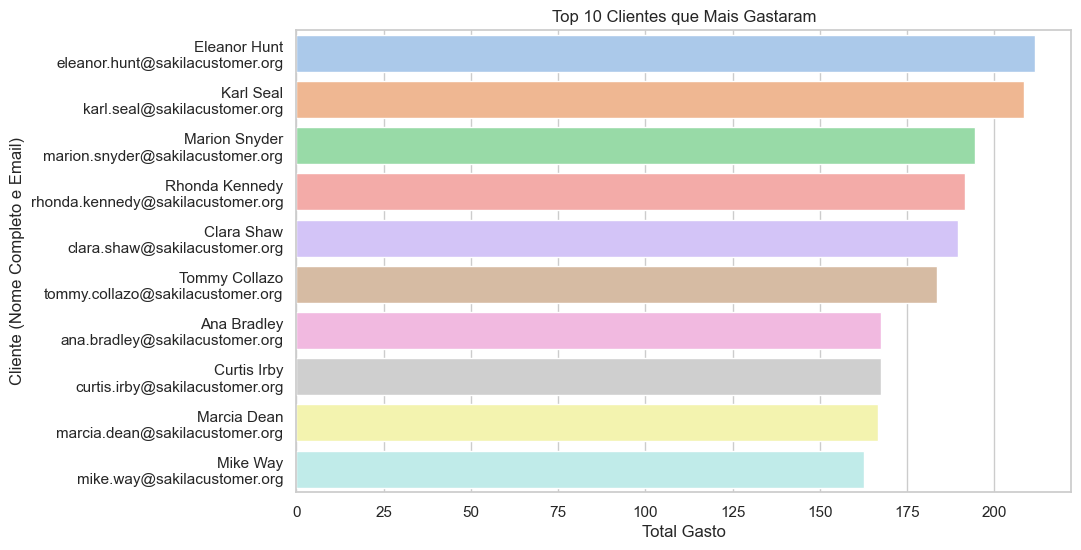

In [6]:
# Plotando os clientes que mais gastaram

print("\nTop 10 clientes que mais gastaram:\n")
print(df_top_customers)

# Criar uma nova coluna para exibir o nome completo dos clientes no eixo y
df_top_customers['customer_full_name'] = (
    df_top_customers['customer_first_name'] + ' ' + 
    df_top_customers['customer_last_name'] + '\n' + 
    df_top_customers['email']
)

# Gráfico 2: Top 10 Clientes que Mais Gastaram, com nomes completos no eixo Y
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_customers, x='total_spent', y='customer_full_name',palette='pastel',hue='customer_full_name')
plt.title('Top 10 Clientes que Mais Gastaram')
plt.xlabel('Total Gasto')
plt.ylabel('Cliente (Nome Completo e Email)')
plt.show()


Top 10 clientes que menos gastaram:

  customer_first_name customer_last_name                               email  \
0               Brian              Wyman      brian.wyman@sakilacustomer.org   
1               Leona             Obrien     leona.obrien@sakilacustomer.org   
2            Caroline             Bowman  caroline.bowman@sakilacustomer.org   
3             Anthony             Schwab   anthony.schwab@sakilacustomer.org   
4             Tiffany             Jordan   tiffany.jordan@sakilacustomer.org   
5                Kirk            Stclair     kirk.stclair@sakilacustomer.org   
6              Bobbie              Craig     bobbie.craig@sakilacustomer.org   
7                  Jo             Fowler        jo.fowler@sakilacustomer.org   
8               Penny               Neal       penny.neal@sakilacustomer.org   
9              Johnny             Turpin    johnny.turpin@sakilacustomer.org   

  total_spent  
0       27.93  
1       32.90  
2       37.87  
3       47.85  
4

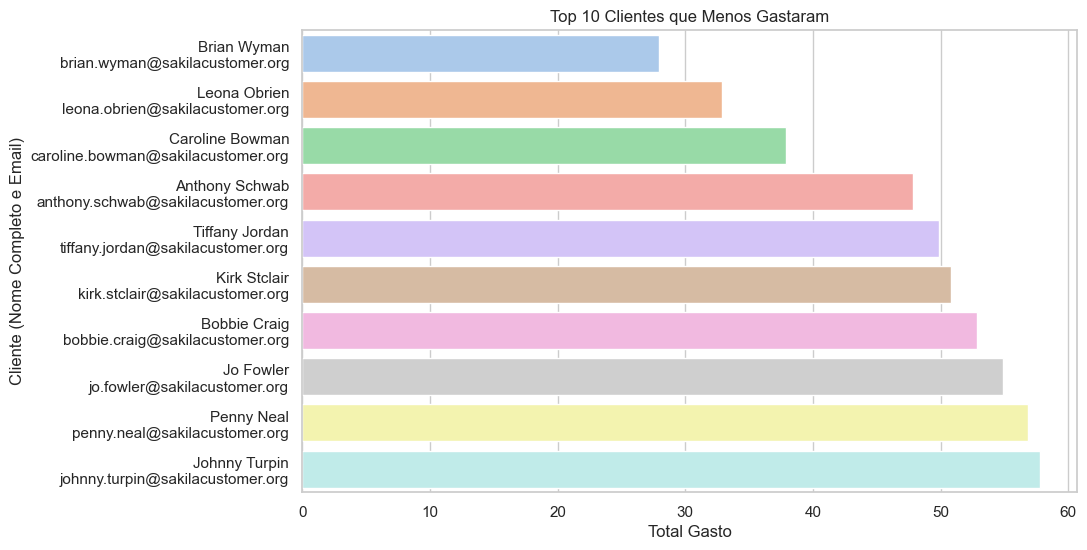

In [7]:
# Plotandos os clientes que menos gastaram

print("\nTop 10 clientes que menos gastaram:\n")
print(df_least_customers)

# Criar uma nova coluna para exibir o nome completo dos clientes no eixo y
df_least_customers['customer_full_name'] = (
    df_least_customers['customer_first_name'] + ' ' + 
    df_least_customers['customer_last_name'] + '\n' + 
    df_least_customers['email']
)

# Gráfico 2: Top 10 Clientes que Menos Gastaram, com nomes completos no eixo Y
plt.figure(figsize=(10, 6))
sns.barplot(data=df_least_customers, x='total_spent', y='customer_full_name',palette='pastel',hue='customer_full_name')
plt.title('Top 10 Clientes que Menos Gastaram')
plt.xlabel('Total Gasto')
plt.ylabel('Cliente (Nome Completo e Email)')
plt.show()